In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    values : List
    symbol : str
    result : str
    ans : int

In [4]:
def calculate(state : AgentState) -> AgentState:
    if state["symbol"] == "+":
        state["ans"] = state["values"][0] + state["values"][1]
        state["result"] = f"Sum of {state["values"][0]} and {state["values"][1]} is {state["ans"]}"
    if state["symbol"] == "*":
        state["ans"] = state["values"][0] * state["values"][1]
        state["result"] = f"Mulplication of {state["values"][0]} and {state["values"][1]} is {state["ans"]}"
    if state["symbol"] == "-":
        state["ans"] = state["values"][0] - state["values"][1]
        state["result"] = f"Subtraction of {state["values"][0]} from {state["values"][1]} is {state["ans"]}"
    if state["symbol"] == "/":
        if state["values"][1] == 0:
            state["result"] = "dividing by 0 is not possible"
        else:
            state["ans"] = state["values"][0] / state["values"][1]
            state["result"] = f"Division of {state["values"][0]} by {state["values"][1]} is {state["ans"]}"
    
    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("calculator", calculate)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

app = graph.compile()

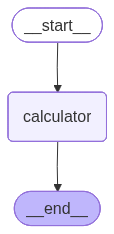

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
answer = app.invoke({"values" : [1,2], "symbol":"+"})
print(answer)

{'values': [1, 2], 'symbol': '+', 'result': 'Sum of 1 and 2 is 3', 'ans': 3}


In [8]:
answer1 = app.invoke({"values" : [3,3], "symbol":"+"})
print(answer1["result"])
answer2 = app.invoke({"values" : [3,-5], "symbol":"*"})
print(answer2["result"])
answer7 = app.invoke({"values" : [3,3], "symbol":"*"})
print(answer7["result"])
answer8 = app.invoke({"values" : [-3,3], "symbol":"*"})
print(answer8["result"])
answer3 = app.invoke({"values" : [5,3], "symbol":"-"})
print(answer3["result"])
answer4 = app.invoke({"values" : [3,5], "symbol":"-"})
print(answer4["result"])
answer5 = app.invoke({"values" : [5,0], "symbol":"/"})
print(answer5["result"])
answer6 = app.invoke({"values" : [5,3], "symbol":"/"})
print(answer6["result"])

Sum of 3 and 3 is 6
Mulplication of 3 and -5 is -15
Mulplication of 3 and 3 is 9
Mulplication of -3 and 3 is -9
Subtraction of 5 from 3 is 2
Subtraction of 3 from 5 is -2
dividing by 0 is not possible
Division of 5 by 3 is 1.6666666666666667
